<p style="font-size:300%; background-color:pink; color:blue; text-align:center;line-height : 80px; margin : 0; padding : 0;">
Taller 8: Sistemas difusos en visión de máquina</p>
<p style="font-size:240%; background-color:pink; color:red; text-align:center;line-height : 60px; margin : 0; padding : 0;">
    
Técnicas de Inteligencia Artificial - Visión de Máquina </p1>

<p style="font-size:200%; text-align:center; line-height : 40px;  margin-top : 0; margin-bottom : 0; "> 
  <br>Est. Brian Camilo Valencia Peña (bcvalenciap@unal.edu.co)
  <br>Est. Esteban Ladino Fajardo (eladinof@unal.edu.co)
</p>

<p style="font-size:180%; text-align:center; line-height : 30px;  margin-top : 0; margin-bottom : 0; "> <br><br>INGENIERÍA ELECTRÓNICA</p>
<p style="font-size:180%; text-align:center; line-height : 30px; margin-top : 0; "> Facultad de Ingeniería</p>
<p style="font-size:160%; text-align:center; line-height : 30px; margin-top : 0; "> Universidad Nacional de Colombia Sede Bogotá</p>
<br>
<img src="figs/Escudo_UN.png",width=100,height=100>

<p style="font-size:160%; text-align:center; line-height : 30px; margin-top : 0; "> <br>20 de Junio de 2022</p>

In [104]:
# Librerías
import numpy as np
import matplotlib.pyplot as plt
import cv2

## Enunciado

1. Estudiar las funciones en API Reference, de la biblioteca
Scikit-Fuzzy. http://pythonhosted.org/scikit-fuzzy/api/api.html


2.  Estudiar el ejemplo: Fuzzy Control Systems: The Tipping Problem, en la misma biblioteca.


3. Implementar alguno de los siguientes algoritmos que emplean lógica difusa (vistos en clase), como una función de phyton:


    3.1 Detector de bordes difuso.

    3.2 Segmentación difusa por umbralización4 .



## Desarrollo [rrr1], [rrr2]

Las funciones de las variables lingüisticas Black y White, se muestra a continuación:


![figs/FuncionesDeRelacion.png](figs/FuncionesDeRelacion.png)

*Funciones de pertenencia del conjunto difuso.[rrr1,Pág. 180]*

Al suponer que la abscisa sea *x* y la ordenada *y* se tiene la siguiente Ecuación para la parte donde la pendiente es distinta de cero:

$$
y(x)= \frac{y_2-y_1}{x_2-x_1} (x-x_1)+y_1
$$

Así, las función para el Negro es:

$$
B(b)=
\left\{
\begin{array}{ll}
1 & \;; 0 \leq b \leq b_1  \\
\frac{B_2-B_1}{b_2-b_1} (b-b_1)+B_1 & \;; b_1 < b < b_2  \\
0 & \;; b_2 \leq b \leq 255  \\  
\end{array}
\right. 
$$

Donde, 

* B: Asignación difusa del negro.
* b: Escala de gris.

Para el blanco se tiene la siguiente función:
$$
W(w)=
\left\{
\begin{array}{ll}
1 & \;; 0 \leq b \leq b_1  \\
\frac{W_2-W_1}{w_2-w_1} (w-w_1)+W_1 & \;; w_1 < w < w_2  \\
0 & \;; w_2 \leq w \leq 255  \\  
\end{array}
\right. 
$$

Donde, 

* W: Asignación difusa del blanco.
* b: Escala de gris.

Al implementarse en python, se tiene:

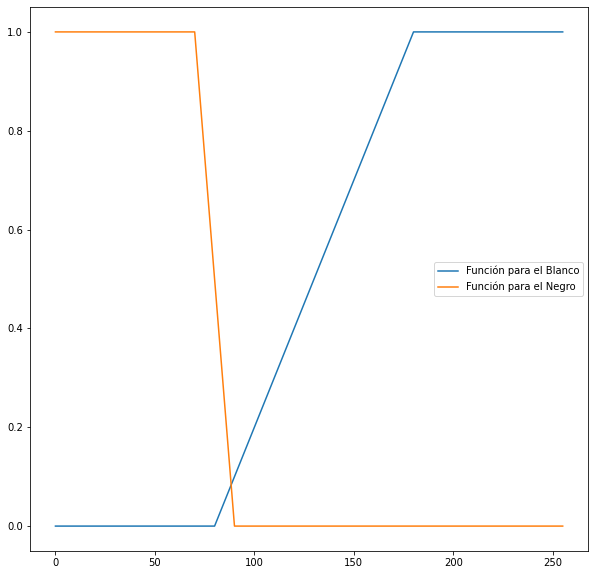

In [105]:
def fun_negro(b,B1,b1,B2,b2):

    if b2<=b<=255:
        return 0
    elif b1<b<b2:
        return (float)(B2-B1)*(b-b1)/(b2-b1)+B1
    else:
        return 1

def fun_blanco(w,W1,w1,W2,w2):
    if w2<=w<=255:
        return 1
    elif w1<w<w2:
        return (float)(W2-W1)*(w-w1)/(w2-w1)+W1
    else:
        return 0

# Asignación del negro    
b=np.arange(0,256,1)
B=np.zeros(b.shape,dtype=float)
B1=1
b1=70
B2=0
b2=90


for i in b:
    B[i]=fun_negro(i,B1,b1,B2,b2)

# Asignación del blanco    
w=np.arange(0,256,1)
W=np.zeros(b.shape,dtype=float)
W1=0
w1=80
W2=1
w2=180


for i in w:
    W[i]=fun_blanco(i,W1,w1,W2,w2)
    
plt.figure(figsize=(10, 10))  
plt.plot(w,W,label='Función para el Blanco')
plt.plot(b,B,label='Función para el Negro')
plt.legend()
plt.show()

Las funciones anteriores sirven para la fusificación, para la defusificación del borde se usará la gráfica rojo de la siguiente Figura.

![figs/Defusificacion.png](figs/Defusificacion.png)

Para que la función sea sobreyectiva (Teniendo en cuenta la defusificación) se va a definir de la siguiente forma para la identificación del borde.

Para el blanco se tiene la siguiente función:
$$
e(E)=135 \; ; E \neq 0 
$$

La función anterior implica que se le va a asignar el valor de 135 al pixel que al aplicar las reglas del sistema difuso de distinto de cero. En python se implementa así:

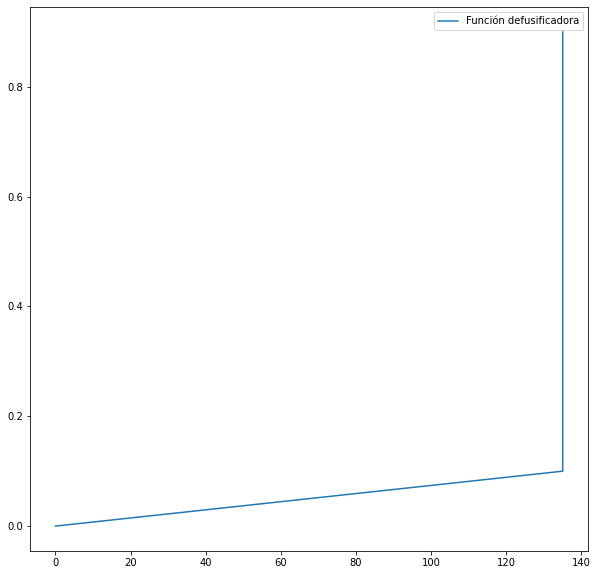

In [106]:
def funBordes(E):
    if E==0:
        return 0
    return 135

E=np.arange(0,1,0.1)
e=np.zeros(E.shape,dtype=int)
for i in range(len(E)):
    e[i]=funBordes(E[i])

plt.figure(figsize=(10, 10))  
plt.plot(e,E,label='Función defusificadora')
plt.legend()
plt.show()


Las reglas del sistema difuso que proponen Abdallah A. Alshennawy, y Ayman A. Aly son:

![figs/Reglas1-4.png](figs/Reglas1-4.png)
*Reglas difusas para líneas verticales y horizontales.[rrr1, Pág. 180]*

![figs/Reglas5-8.png](figs/Reglas5-8.png)
*Reglas difusas para los bordes restantes.[rrr1, Pág. 180]*

Se resalta que todos los bordes son detectados con estas ocho reglas, los operadores AND y OR se sustituyen por las funciones mínimo y máximo respectivamente. Los pasos que se realizan para hallar los contornos de se muestra a continuación:

![figs/Reglas5-8.png](figs/PasosParaHallarBordes.png)
*Pasos para hallar los bordes.[rrr1, Pág. 181]*

Al pixel (i,j) se le realiza la fusificación y se obtiene un sistema inferencial difuso. Luego, al aplicar la defusificación mediante las reglas difusas se determina si es blanco, negro o es un borde. En este caso solo se detecta el borde. 




In [107]:
# Aplicación de reglas difusas

def reglasDifusas(EBlancos,ENegros):
    
    E_1B,E_2B,E_3B,E_4B,E_5B,E_6B,E_7B,E_8B,E_9B=EBlancos
    E_1N,E_2N,E_3N,E_4N,E_5N,E_6N,E_7N,E_8N,E_9N=ENegros

    # regla 1
    ra=min(E_1B,min(E_2B,E_3B))
    rb=min(E_4B,min(E_5B,E_6B))
    rc=min(E_7N,min(E_8N,E_9N))

    r1=min(ra,min(rb,rc))

    # Regla 2
    ra=min(E_1N,min(E_2N,E_3N))
    rb=min(E_4B,min(E_5B,E_6B))
    rc=min(E_7B,min(E_8B,E_9B))

    r2=min(ra,min(rb,rc))

    # Regla 3
    ra=np.amin([
    E_2B,E_3B,
    E_5B,E_6B,
    E_8B,E_9B
    ])

    rb=np.min([E_1N,
    E_4N,
    E_7N
    ])

    r3=min(ra,rb)
    
    # Regla 4
    ra=np.amin([E_1B,E_2B,
    E_4B,E_5B,
    E_7B,E_8B
    ])

    rb=np.min([E_3N,
    E_6N,
    E_9N
    ])

    r4=min(ra,rb)
    
    # Regla 5
    ra=np.amin([E_1N,E_2N,E_4N,E_7N])
    rb=np.amin([E_3B,E_5B,E_6B,E_8B,E_9B])
   
    r5=min(ra,rb)

    # Regla 6
    ra=np.amin([E_1B,E_2B,E_4B,E_7B,E_5B])
    rb=np.amin([E_3N,E_6N,E_8N,E_9N])
   
    r6=min(ra,rb)

    # Regla 7
    
    ra=np.amin([E_1N,E_4N,E_7N,E_8N])
    rb=np.amin([E_2B,E_3B,E_5B,E_6B,E_9B])
   
    r7=min(ra,rb)

    # Regla 8
    ra=np.amin([E_1B,E_4B,E_7B,E_5B,E_8B])
    rb=np.amin([E_2N,E_3N,E_6N,E_9N])
   
    r8=min(ra,rb)

    return np.amax([r1,r2,r3,r4,r5,r6,r7,r8])

def funFusificacion(img_gray):
    '''  
    img_gray: Imagen en escala de grises
    '''
    # Asignación del negro    
    B1=1
    b1=70
    B2=0
    b2=90


    # Asignación del blanco    
    W1=0
    w1=80
    W2=1
    w2=180

  
   

    n,m=img_gray.shape
    img_negro=np.zeros([n,m],dtype=np.uint8)
    img_blanco=np.zeros([n,m],dtype=np.uint8)

    for i in range(n):
        for j in range(m):
            img_negro[i,j]=fun_negro(img_gray[i,j],B1,b1,B2,b2)
            img_blanco[i,j]=fun_blanco(img_gray[i,j],W1,w1,W2,w2)
            

    return [img_blanco,img_negro]

def funDeFusificacion(img_blanco,img_negro):
    n,m=img_blanco.shape
    auxImgContorno=np.zeros([n,m],dtype=np.uint8)

    # Se aplican las reglas difusas
    for i in range(1,n-1,1):
        for j in range(1,m-1,1):

            arrayNegros=np.array([img_negro[i-1,j-1],img_negro[i-1,j],img_negro[i-1,j+1],
                img_negro[i,j-1],img_negro[i,j],img_negro[i,j+1],
                img_negro[i+1,j-1],img_negro[i+1,j],img_negro[i+1,j+1]])

            arrayBlancos=np.array([img_blanco[i-1,j-1],img_blanco[i-1,j],img_blanco[i-1,j+1],
                img_blanco[i,j-1],img_blanco[i,j],img_blanco[i,j+1],
                img_blanco[i+1,j-1],img_blanco[i+1,j],img_blanco[i+1,j+1]])

            auxImgContorno[i,j]=reglasDifusas(arrayNegros,arrayBlancos)

    return auxImgContorno

def funDetectorBordesDifuso(auxImgContorno):
    
    n,m=auxImgContorno.shape
    bordes=np.zeros([n,m],dtype=np.uint8)

    for i in range(n):
        for j in range(m):
            bordes[i,j]=funBordes(auxImgContorno[i,j])
            if bordes[i,j]!=0:
                bordes[i,j]=255
    
    return bordes


Ahora, se ponen a prueba las funciones realizadas

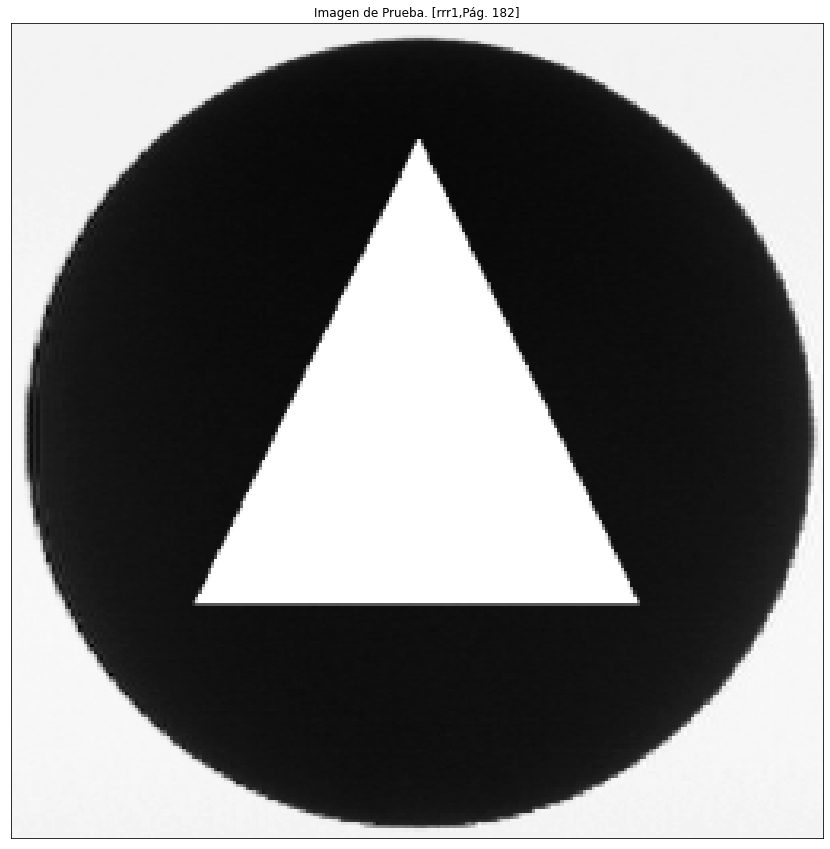

In [108]:
imagen=cv2.imread(f'figs/imagenTest.png')
imagen=cv2.cvtColor(imagen,cv2.COLOR_BGR2RGB)
imagen_gray=cv2.cvtColor(imagen,cv2.COLOR_RGB2GRAY)

n=imagen_gray.shape[0]
m=imagen_gray.shape[1]

escala= 256/min(n,m)

imagen_gray= cv2.resize(imagen_gray, None, fx=escala, fy= escala,\
                                interpolation= cv2.INTER_LINEAR)

plt.figure(figsize=(15, 15))

plt.subplot(1,1,1),plt.imshow(imagen_gray,cmap = 'gray')
plt.title('Imagen de Prueba. [rrr1,Pág. 182]')
plt.xticks([]),plt.yticks([])

plt.show()

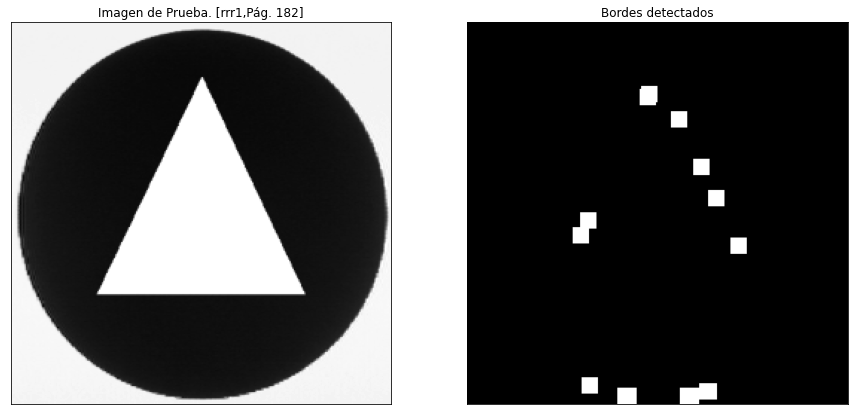

In [109]:
img_blanco,img_negro=funFusificacion(imagen_gray)
auxImgContorno=funDeFusificacion(img_blanco,img_negro)
img_bordes_difusos=funDetectorBordesDifuso(auxImgContorno)

elemento_rectangular = cv2.getStructuringElement(cv2.MORPH_RECT,(3,3))
kernel=elemento_rectangular

img_bordes_difusos=cv2.dilate(img_bordes_difusos,kernel,iterations = 5)

plt.figure(figsize=(15, 15))

plt.subplot(1,2,1),plt.imshow(imagen_gray,cmap = 'gray')
plt.title('Imagen de Prueba. [rrr1,Pág. 182]')
plt.xticks([]),plt.yticks([])


plt.subplot(1,2,2),plt.imshow(img_bordes_difusos,cmap = 'gray')
plt.title('Bordes detectados')
plt.xticks([]),plt.yticks([])

plt.show()


### Función para la detección de bordes mediante lógica difusa

Dado que el detector de bordes funcionó (no tan óptimamente) se procede a realizar la función

In [110]:
def detectorDeBordesDifuso(imagen_gray,B,b,W,w):
    # Aplicación de reglas difusas

    def reglasDifusas(EBlancos,ENegros):
        
        E_1B,E_2B,E_3B,E_4B,E_5B,E_6B,E_7B,E_8B,E_9B=EBlancos
        E_1N,E_2N,E_3N,E_4N,E_5N,E_6N,E_7N,E_8N,E_9N=ENegros

        # regla 1
        ra=min(E_1B,min(E_2B,E_3B))
        rb=min(E_4B,min(E_5B,E_6B))
        rc=min(E_7N,min(E_8N,E_9N))

        r1=min(ra,min(rb,rc))

        # Regla 2
        ra=min(E_1N,min(E_2N,E_3N))
        rb=min(E_4B,min(E_5B,E_6B))
        rc=min(E_7B,min(E_8B,E_9B))

        r2=min(ra,min(rb,rc))

        # Regla 3
        ra=np.amin([
        E_2B,E_3B,
        E_5B,E_6B,
        E_8B,E_9B
        ])

        rb=np.min([E_1N,
        E_4N,
        E_7N
        ])

        r3=min(ra,rb)
        
        # Regla 4
        ra=np.amin([E_1B,E_2B,
        E_4B,E_5B,
        E_7B,E_8B
        ])

        rb=np.min([E_3N,
        E_6N,
        E_9N
        ])

        r4=min(ra,rb)
        
        # Regla 5
        ra=np.amin([E_1N,E_2N,E_4N,E_7N])
        rb=np.amin([E_3B,E_5B,E_6B,E_8B,E_9B])
    
        r5=min(ra,rb)

        # Regla 6
        ra=np.amin([E_1B,E_2B,E_4B,E_7B,E_5B])
        rb=np.amin([E_3N,E_6N,E_8N,E_9N])
    
        r6=min(ra,rb)

        # Regla 7
        
        ra=np.amin([E_1N,E_4N,E_7N,E_8N])
        rb=np.amin([E_2B,E_3B,E_5B,E_6B,E_9B])
    
        r7=min(ra,rb)

        # Regla 8
        ra=np.amin([E_1B,E_4B,E_7B,E_5B,E_8B])
        rb=np.amin([E_2N,E_3N,E_6N,E_9N])
    
        r8=min(ra,rb)

        return np.amax([r1,r2,r3,r4,r5,r6,r7,r8])
    
    def fun_negro(b,B1,b1,B2,b2):

        if b2<=b<=255:
            return 0
        elif b1<b<b2:
            return (float)(B2-B1)*(b-b1)/(b2-b1)+B1
        else:
            return 1

    def fun_blanco(w,W1,w1,W2,w2):
        if w2<=w<=255:
            return 1
        elif w1<w<w2:
            return (float)(W2-W1)*(w-w1)/(w2-w1)+W1
        else:
            return 0
    def funBordes(E):
        if E==0:
            return 0
        return 135
        
    def funFusificacion(img_gray):
        '''  
        img_gray: Imagen en escala de grises
        '''
        # Asignación del negro    
        B1,B2=B
        b1,b2=b

        # Asignación del blanco    

        W1,W2=W
        w1,w2=w

        # Se grafican las funciones difusas para el negro y el blanco
        # Asignación del negro    
        auxb=np.arange(0,256,1)
        auxB=np.zeros(auxb.shape,dtype=float)


        for i in auxb:
            auxB[i]=fun_negro(i,B1,b1,B2,b2)

        # Asignación del blanco    
        auxw=np.arange(0,256,1)
        auxW=np.zeros(auxw.shape,dtype=float)


        for i in auxw:
            auxW[i]=fun_blanco(i,W1,w1,W2,w2)
            
        plt.figure(figsize=(10, 10))  
        plt.plot(auxw,auxW,label='Función para el Blanco')
        plt.plot(auxb,auxB,label='Función para el Negro')
        plt.legend()
        plt.show()
        

        n,m=img_gray.shape
        img_negro=np.zeros([n,m],dtype=np.uint8)
        img_blanco=np.zeros([n,m],dtype=np.uint8)

        for i in range(n):
            for j in range(m):
                img_negro[i,j]=fun_negro(img_gray[i,j],B1,b1,B2,b2)
                img_blanco[i,j]=fun_blanco(img_gray[i,j],W1,w1,W2,w2)
                

        return [img_blanco,img_negro]

    def funDeFusificacion(img_blanco,img_negro):
        n,m=img_blanco.shape
        auxImgContorno=np.zeros([n,m],dtype=np.uint8)

        # Se aplican las reglas difusas a cada pixel i,j
        for i in range(1,n-1,1):
            for j in range(1,m-1,1):

                arrayNegros=np.array([img_negro[i-1,j-1],img_negro[i-1,j],img_negro[i-1,j+1],
                    img_negro[i,j-1],img_negro[i,j],img_negro[i,j+1],
                    img_negro[i+1,j-1],img_negro[i+1,j],img_negro[i+1,j+1]])

                arrayBlancos=np.array([img_blanco[i-1,j-1],img_blanco[i-1,j],img_blanco[i-1,j+1],
                    img_blanco[i,j-1],img_blanco[i,j],img_blanco[i,j+1],
                    img_blanco[i+1,j-1],img_blanco[i+1,j],img_blanco[i+1,j+1]])

                auxImgContorno[i,j]=reglasDifusas(arrayNegros,arrayBlancos)

        return auxImgContorno

    def funDetectorBordesDifuso(auxImgContorno):
        
        n,m=auxImgContorno.shape
        bordes=np.zeros([n,m],dtype=np.uint8)

        for i in range(n):
            for j in range(m):
                bordes[i,j]=funBordes(auxImgContorno[i,j])
                if bordes[i,j]!=0:
                    bordes[i,j]=255
        
        return bordes
    
    img_blanco,img_negro=funFusificacion(imagen_gray)
    auxImgContorno=funDeFusificacion(img_blanco,img_negro)
    return funDetectorBordesDifuso(auxImgContorno)

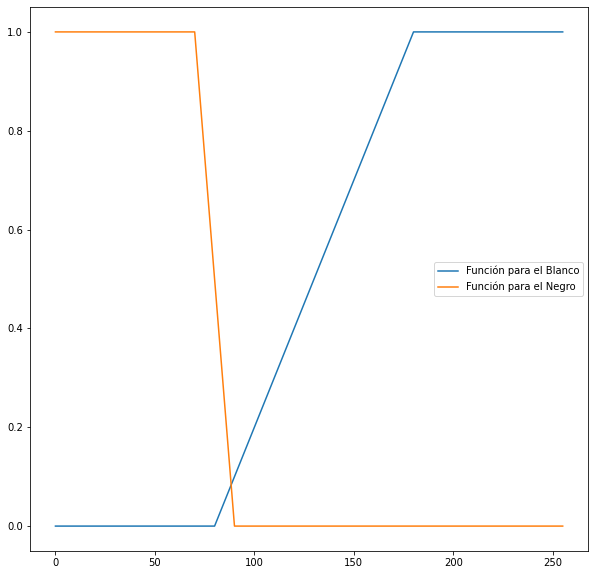

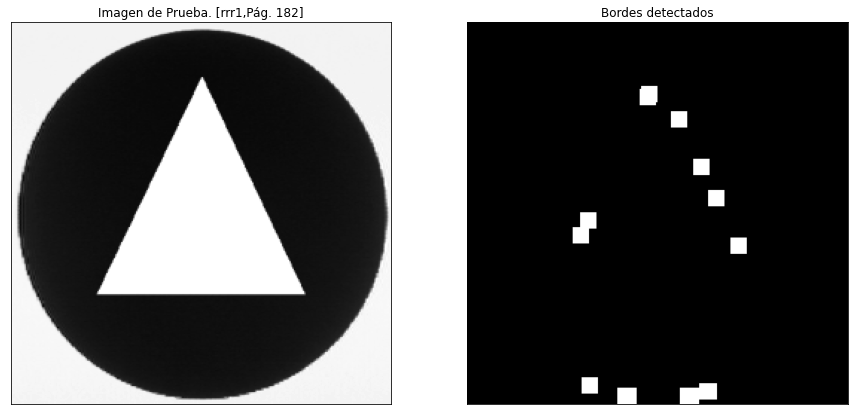

In [111]:
## Utilización de la función
# Asignación del negro    
B1=1
b1=70
B2=0
b2=90


# Asignación del blanco    
W1=0
w1=80
W2=1
w2=180

img_bordes_difusos=detectorDeBordesDifuso(imagen_gray,[B1,B2],[b1,b2],[W1,W2],[w1,w2])
img_bordes_difusos=cv2.dilate(img_bordes_difusos,kernel,iterations = 5)

plt.figure(figsize=(15, 15))

plt.subplot(1,2,1),plt.imshow(imagen_gray,cmap = 'gray')
plt.title('Imagen de Prueba. [rrr1,Pág. 182]')
plt.xticks([]),plt.yticks([])


plt.subplot(1,2,2),plt.imshow(img_bordes_difusos,cmap = 'gray')
plt.title('Bordes detectados')
plt.xticks([]),plt.yticks([])

plt.show()

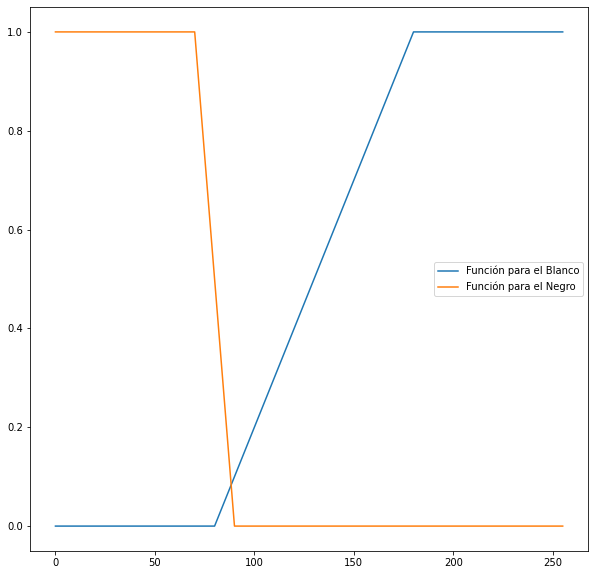

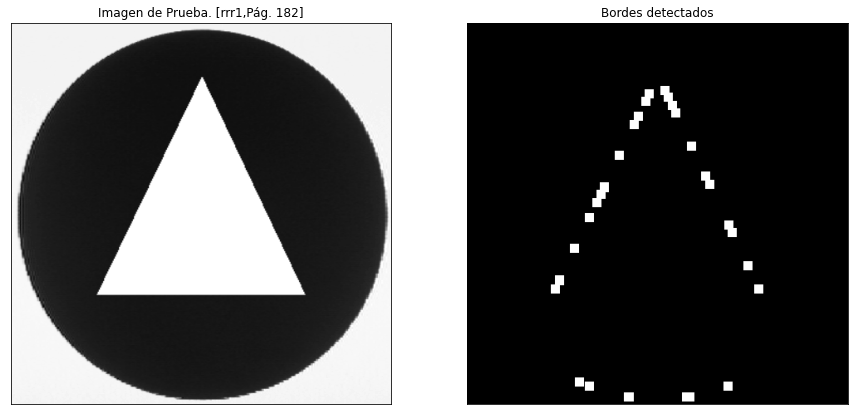

In [112]:
## Aumento de resolución

imagen_gray=cv2.cvtColor(imagen,cv2.COLOR_RGB2GRAY)

img_bordes_difusos=detectorDeBordesDifuso(imagen_gray,[B1,B2],[b1,b2],[W1,W2],[w1,w2])
img_bordes_difusos=cv2.dilate(img_bordes_difusos,kernel,iterations = 5)

plt.figure(figsize=(15, 15))

plt.subplot(1,2,1),plt.imshow(imagen_gray,cmap = 'gray')
plt.title('Imagen de Prueba. [rrr1,Pág. 182]')
plt.xticks([]),plt.yticks([])


plt.subplot(1,2,2),plt.imshow(img_bordes_difusos,cmap = 'gray')
plt.title('Bordes detectados')
plt.xticks([]),plt.yticks([])

plt.show()

Nótese que al aumentar la resolución aumenta el la detección del contorno.

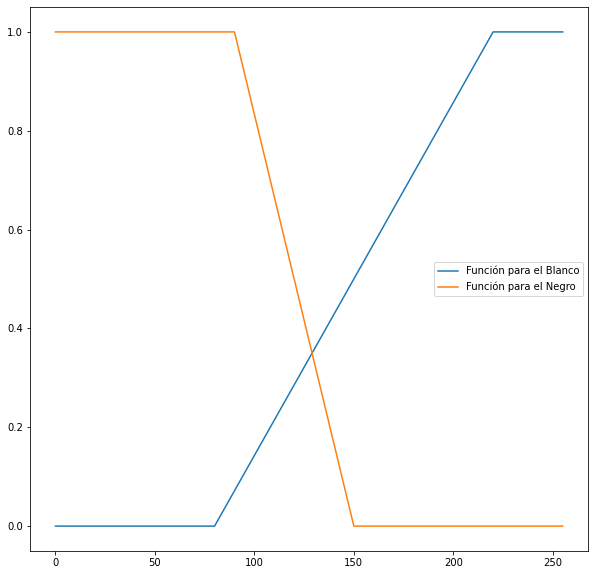

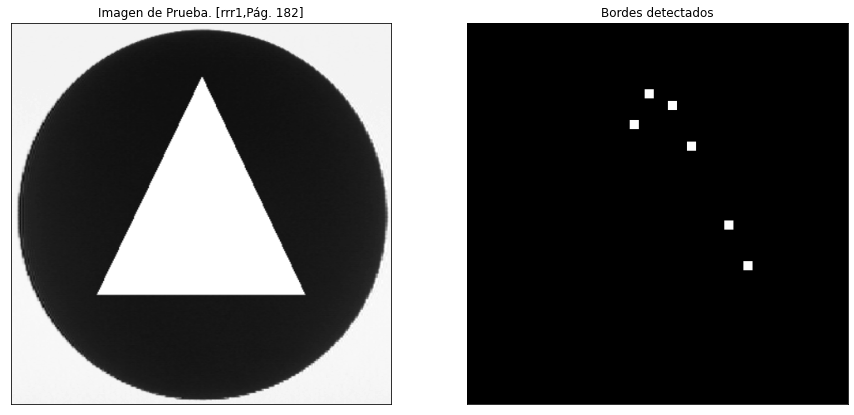

In [113]:
## Variación de la función que define el blanco y el negro
# Asignación del negro    
B1=1
b1=90
B2=0
b2=150


# Asignación del blanco    
W1=0
w1=80
W2=1
w2=220

img_bordes_difusos=detectorDeBordesDifuso(imagen_gray,[B1,B2],[b1,b2],[W1,W2],[w1,w2])
img_bordes_difusos=cv2.dilate(img_bordes_difusos,kernel,iterations = 5)

plt.figure(figsize=(15, 15))

plt.subplot(1,2,1),plt.imshow(imagen_gray,cmap = 'gray')
plt.title('Imagen de Prueba. [rrr1,Pág. 182]')
plt.xticks([]),plt.yticks([])


plt.subplot(1,2,2),plt.imshow(img_bordes_difusos,cmap = 'gray')
plt.title('Bordes detectados')
plt.xticks([]),plt.yticks([])

plt.show()

Además, es sensible a los cambios de la función que define el blanco y el negro. 